In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
v1 = pd.read_csv('data/aave_usdc_interest_v1.csv') 
v2 = pd.read_csv('data/aave_usdc_interest_v2.csv')

v1 = v1[v1['asset'] != 'empty']
v2 = v2[v2['asset'] != 'empty']

v2 = v2[v2['timestamp'] >= '2021-01-01']

v1['version'] = 'aave_v1'
v2['version'] = 'aave_v2'

In [58]:
df = pd.concat([v1, v2], ignore_index=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.strftime('%Y-%m-%d')
df.sort_values(by='timestamp', ascending=True, inplace=True, ignore_index=True)
df[df['date'].duplicated(keep=False)] #show duplicates

,asset,epoch,timestamp,supply,borrow,supply_ma30,borrow_ma30,version,date
0,usdc,1578516760,2020-01-08 20:52:40,0.000389,0.011666,0.000000,0.000000,aave_v1,2020-01-08
1,usdc,1578608791,2020-01-09 22:26:31,0.017103,0.032794,0.000000,0.000000,aave_v1,2020-01-09
2,usdc,1578700655,2020-01-10 23:57:35,0.042308,0.047578,0.000000,0.000000,aave_v1,2020-01-10
3,usdc,1578776891,2020-01-11 21:08:11,0.042584,0.048000,0.000000,0.000000,aave_v1,2020-01-11
4,usdc,1578865498,2020-01-12 21:44:58,0.042594,0.048429,0.000000,0.000000,aave_v1,2020-01-12
...,...,...,...,...,...,...,...,...,...
961,usdc,1661558163,2022-08-26 23:56:03,0.004584,0.014537,0.005647,0.015740,aave_v2,2022-08-26
962,usdc,1661644615,2022-08-27 23:56:55,0.004573,0.014524,0.005594,0.015684,aave_v2,2022-08-27
963,usdc,1661731149,2022-08-28 23:59:09,0.003835,0.013252,0.005554,0.015603,aave_v2,2022-08-28
964,usdc,1661816834,2022-08-29 23:47:14,0.003813,0.013222,0.005457,0.015466,aave_v2,2022-08-29


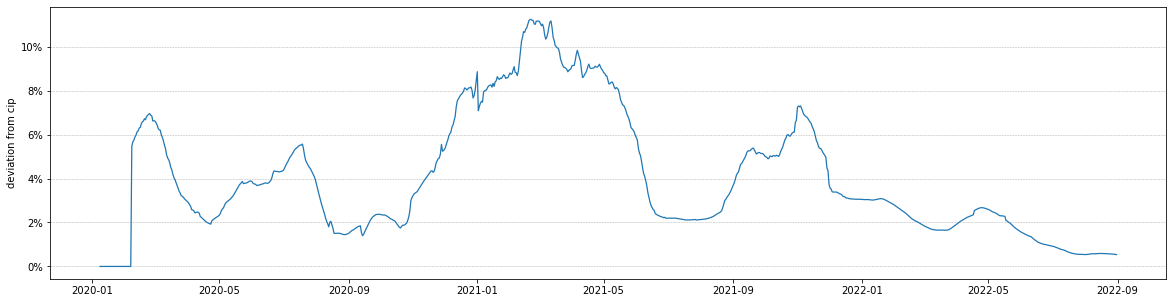

In [59]:
fig, ax = plt.subplots(figsize =(20,5))

ax.plot(df['timestamp'], df['supply_ma30'], linewidth=1.25)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax.set_ylabel('deviation from cip')
ax.grid(axis='y', linestyle='--', linewidth=.5)

left, right = plt.xlim()
ax.set_xlim(left+1, right-1)

plt.show()

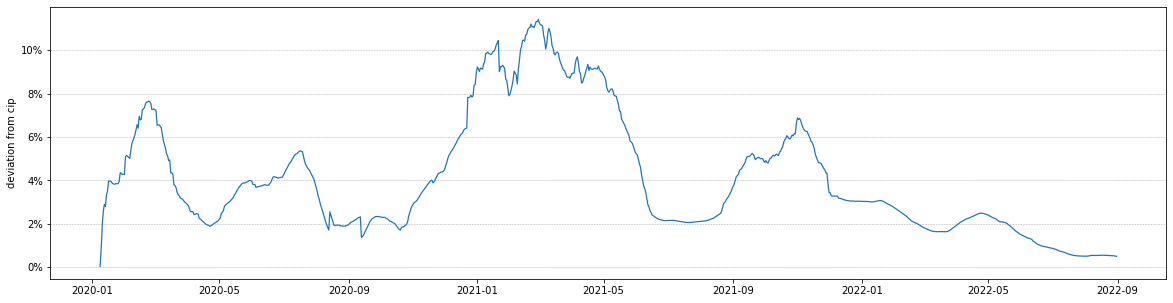

In [61]:
fig, ax = plt.subplots(figsize =(20,5))

ax.plot(df['timestamp'], df['supply'].rolling(30, min_periods=1).mean(), linewidth=1.25)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


ax.set_ylabel('deviation from cip')
ax.grid(axis='y', linestyle='--', linewidth=.5)

left, right = plt.xlim()
ax.set_xlim(left+1, right-1)

plt.show()